In [1]:
!pip install gradio
import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 34.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 12.3

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

training_data = pd.read_csv('/content/drive/MyDrive/Dat158/HousingPredictor/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Dat158/HousingPredictor/test.csv')

#Configure pandas such that all columns are displayed.
pd.set_option('display.max_columns', None)


Mounted at /content/drive


In [3]:
display(training_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

In [4]:
drop_columns = ['MSSubClass',
                'MSZoning',
                'LotFrontage',
                'Street',
                'Alley',
                'LotShape',
                'LandContour',
                'Utilities',
                'LotConfig',
                'LandSlope',
                'Condition1',
                'Condition2',
                'HouseStyle',
                'RoofStyle',
                'RoofMatl',
                'Exterior1st',
                'Exterior2nd',
                'MasVnrType',
                'MasVnrArea',
                'Foundation',
                'BsmtFinSF1',
                'BsmtFinSF2',
                'BsmtUnfSF',
                'TotalBsmtSF',
                'HeatingQC',
                'Electrical',
                'LowQualFinSF',
                'GrLivArea',
                'TotRmsAbvGrd',
                'Functional',
                'FireplaceQu',
                'GarageType',
                'GarageYrBlt',
                'GarageFinish',
                'GarageCars',
                'GarageQual',
                'GarageCond',
                'PavedDrive',
                'EnclosedPorch',
                '3SsnPorch',
                'ScreenPorch',
                'PoolQC',
                'MiscFeature',
                'MiscVal']

training_data = training_data.drop(columns=drop_columns, axis=1)
test_data = test_data.drop(columns=drop_columns, axis=1)

display(training_data)

,Id,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,8450,CollgCr,1Fam,7,5,2003,2003,Gd,TA,Gd,TA,No,GLQ,Unf,GasA,Y,856,854,1,0,2,1,3,1,Gd,0,548,0,61,0,NaN,2,2008,WD,Normal,208500
1,2,9600,Veenker,1Fam,6,8,1976,1976,TA,TA,Gd,TA,Gd,ALQ,Unf,GasA,Y,1262,0,0,1,2,0,3,1,TA,1,460,298,0,0,NaN,5,2007,WD,Normal,181500
2,3,11250,CollgCr,1Fam,7,5,2001,2002,Gd,TA,Gd,TA,Mn,GLQ,Unf,GasA,Y,920,866,1,0,2,1,3,1,Gd,1,608,0,42,0,NaN,9,2008,WD,Normal,223500
3,4,9550,Crawfor,1Fam,7,5,1915,1970,TA,TA,TA,Gd,No,ALQ,Unf,GasA,Y,961,756,1,0,1,0,3,1,Gd,1,642,0,35,0,NaN,2,2006,WD,Abnorml,140000
4,5,14260,NoRidge,1Fam,8,5,2000,2000,Gd,TA,Gd,TA,Av,GLQ,Unf,GasA,Y,1145,1053,1,0,2,1,4,1,Gd,1,836,192,84,0,NaN,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,Gilbert,1Fam,6,5,1999,2000,TA,TA,Gd,TA,No,Unf,Unf,GasA,Y,953,694,0,0,2,1,3,1,TA,1,460,0,40,0,NaN,8,2007,WD,Normal,175000
1456,1457,13175,NWAmes,1Fam,6,6,1978,1988,TA,TA,Gd,TA,No,ALQ,Rec,GasA,Y,2073,0,1,0,2,0,3,1,TA,2,500,349,0,0,MnPrv,2,2010,WD,Normal,210000
1457,1458,9042,Crawfor,1Fam,7,9,1941,2006,Ex,Gd,TA,Gd,No,GLQ,Unf,GasA,Y,1188,1152,0,0,2,0,4,1,Gd,2,252,0,60,0,GdPrv,5,2010,WD,Normal,266500
1458,1459,9717,NAmes,1Fam,5,6,1950,1996,TA,TA,TA,TA,Mn,GLQ,Rec,GasA,Y,1078,0,1,0,1,0,2,1,Gd,0,240,366,0,0,NaN,4,2010,WD,Normal,142125


In [5]:
from IPython.utils.text import string
mylist = []
for i in range(len(test_data.columns)):
   data_type_str = str(test_data.dtypes[i])  # Convert data type to a string
   if data_type_str == 'object' or data_type_str == 'string':
      column_name = test_data.columns[i]

      uniques = set(training_data[column_name].unique())
      mydf = pd.DataFrame(uniques)
      mydf.fillna('None')

      print(f"{column_name}")

      mylist.append(column_name)

print("mylist: ",mylist)

Neighborhood
BldgType
ExterQual
ExterCond
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
CentralAir
KitchenQual
Fence
SaleType
SaleCondition
mylist:  ['Neighborhood', 'BldgType', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'KitchenQual', 'Fence', 'SaleType', 'SaleCondition']


In [6]:
from IPython.utils.text import string
mylist = []
for i in range(len(test_data.columns)):
  data_type_str = str(test_data.dtypes[i])  # Convert data type to a string
  column_name = test_data.columns[i]

  uniques = set(training_data[column_name].unique())
  print(f"{column_name} {data_type_str} {uniques}")



print("mylist: ",mylist)

Id int64 {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220

In [7]:
# Find all columns where a NAN is found
columns_with_nan = training_data.columns[training_data.isna().any()].tolist()

columns_with_nan_test = test_data.columns[test_data.isna().any()].tolist()

training_data_non_id = training_data

# Set all Fence NAN to None
training_data['Fence'] = training_data['Fence'].fillna('None')
test_data['Fence'] = training_data['Fence'].fillna('None')

training_data['BsmtFinType1'] = training_data['BsmtFinType1'].fillna('None')
training_data['BsmtFinType2'] = training_data['BsmtFinType2'].fillna('None')
training_data['BsmtQual'] = training_data['BsmtQual'].fillna('None')
training_data['BsmtCond'] = training_data['BsmtCond'].fillna('None')
training_data['BsmtFullBath'] = training_data['BsmtFullBath'].fillna(0.0)
training_data['BsmtHalfBath'] = training_data['BsmtHalfBath'].fillna(0.0)


# Remove all other NAN values
training_data = training_data.dropna()


#Making sure to set all NAN from Test data to a value, since submission is strict
test_data['BsmtExposure'] = test_data['BsmtExposure'].fillna('None')
test_data['BsmtQual'] = test_data['BsmtQual'].fillna('None')
test_data['BsmtCond'] = test_data['BsmtCond'].fillna('None')
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].fillna('None')
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].fillna('None')
test_data['BsmtFullBath'] = test_data['BsmtFullBath'].fillna(0.0)
test_data['BsmtHalfBath'] = test_data['BsmtHalfBath'].fillna(0.0)
test_data['KitchenQual'] = test_data['KitchenQual'].fillna('None')
test_data['GarageArea'] = test_data['GarageArea'].fillna(0.0)
test_data['SaleType'] = test_data['SaleType'].fillna('None')


In [8]:
print(test_data.columns[test_data.eq('Wall').any()].tolist())

['Heating']


In [9]:
#Changing char and string representations to numbers

data_ids = training_data['Neighborhood'].unique()
data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['Neighborhood'] = training_data['Neighborhood'].replace({i : current_num})
  test_data['Neighborhood'] = test_data['Neighborhood'].replace({i : current_num})

  current_num += 1.0

<ipython-input-9-939f51b1e3be>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['Neighborhood'] = training_data['Neighborhood'].replace({i : current_num})


In [10]:
data_ids = training_data['SaleCondition'].unique()
data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['SaleCondition'] = training_data['SaleCondition'].replace({i : current_num})
  test_data['SaleCondition'] = test_data['SaleCondition'].replace({i : current_num})

  current_num += 1.0

<ipython-input-10-428c8c700b1f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['SaleCondition'] = training_data['SaleCondition'].replace({i : current_num})


In [11]:
data_ids = test_data['SaleType'].unique()
data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['SaleType'] = training_data['SaleType'].replace({i : current_num})
  test_data['SaleType'] = test_data['SaleType'].replace({i : current_num})

  current_num += 1.0

<ipython-input-11-c86ea822ddd6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['SaleType'] = training_data['SaleType'].replace({i : current_num})


In [12]:
data_ids = training_data['Fence'].unique()
data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['Fence'] = training_data['Fence'].replace({i : current_num})
  test_data['Fence'] = test_data['Fence'].replace({i : current_num})

  current_num += 1.0

<ipython-input-12-fa1419c7ce70>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['Fence'] = training_data['Fence'].replace({i : current_num})


In [13]:
data_ids = test_data['KitchenQual'].unique()
data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['KitchenQual'] = training_data['KitchenQual'].replace({i : current_num})
  test_data['KitchenQual'] = test_data['KitchenQual'].replace({i : current_num})

  current_num += 1.0

<ipython-input-13-9219a7218c83>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['KitchenQual'] = training_data['KitchenQual'].replace({i : current_num})


In [14]:
#Changing N to 0.0 and Y to 1.0
training_data['CentralAir'] = training_data['CentralAir'].replace({'N': 0.0, 'Y': 1.0})

test_data['CentralAir'] = test_data['CentralAir'].replace({'N': 0.0, 'Y': 1.0})

<ipython-input-14-5138406ba67e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['CentralAir'] = training_data['CentralAir'].replace({'N': 0.0, 'Y': 1.0})


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
data_ids_training = set(training_data['Heating'].unique())
data_ids_test = set(test_data['Heating'].unique())
data_ids = data_ids_training.union(data_ids_test)

data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['Heating'] = training_data['Heating'].replace({i : current_num})
  test_data['Heating'] = test_data['Heating'].replace({i : current_num})

  current_num += 1.0

<ipython-input-16-2a6a59b371df>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['Heating'] = training_data['Heating'].replace({i : current_num})


In [17]:
data_ids = test_data['BsmtCond'].unique()
data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['BsmtCond'] = training_data['BsmtCond'].replace({i : current_num})
  test_data['BsmtCond'] = test_data['BsmtCond'].replace({i : current_num})

  current_num += 1.0

<ipython-input-17-adf0d068554f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['BsmtCond'] = training_data['BsmtCond'].replace({i : current_num})


In [18]:
data_ids = test_data['BsmtExposure'].unique()
data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['BsmtExposure'] = training_data['BsmtExposure'].replace({i : current_num})
  test_data['BsmtExposure'] = test_data['BsmtExposure'].replace({i : current_num})

  current_num += 1.0

<ipython-input-18-a864b04d120a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['BsmtExposure'] = training_data['BsmtExposure'].replace({i : current_num})


In [19]:
data_ids = test_data['BsmtFinType1'].unique()
data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['BsmtFinType1'] = training_data['BsmtFinType1'].replace({i : current_num})
  test_data['BsmtFinType1'] = test_data['BsmtFinType1'].replace({i : current_num})

  current_num += 1.0

<ipython-input-19-9e1c9bc6c072>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['BsmtFinType1'] = training_data['BsmtFinType1'].replace({i : current_num})


In [20]:
data_ids_training = set(training_data['BsmtFinType2'].unique())
data_ids_test = set(test_data['BsmtFinType2'].unique())
data_ids = data_ids_training.union(data_ids_test)

data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['BsmtFinType2'] = training_data['BsmtFinType2'].replace({i : current_num})
  test_data['BsmtFinType2'] = test_data['BsmtFinType2'].replace({i : current_num})

  current_num += 1.0

<ipython-input-20-03c5d2a5c627>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['BsmtFinType2'] = training_data['BsmtFinType2'].replace({i : current_num})


In [21]:
data_ids = training_data['BldgType'].unique()
data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['BldgType'] = training_data['BldgType'].replace({i : current_num})
  test_data['BldgType'] = test_data['BldgType'].replace({i : current_num})

  current_num += 1.0

<ipython-input-21-e11ef49b29fb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['BldgType'] = training_data['BldgType'].replace({i : current_num})


In [22]:
data_ids = training_data['ExterQual'].unique()
data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['ExterQual'] = training_data['ExterQual'].replace({i : current_num})
  test_data['ExterQual'] = test_data['ExterQual'].replace({i : current_num})

  current_num += 1.0

<ipython-input-22-eb9efffc1b61>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['ExterQual'] = training_data['ExterQual'].replace({i : current_num})


In [23]:
data_ids = training_data['ExterCond'].unique()
data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['ExterCond'] = training_data['ExterCond'].replace({i : current_num})
  test_data['ExterCond'] = test_data['ExterCond'].replace({i : current_num})

  current_num += 1.0

<ipython-input-23-ecaa9e0a4e3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['ExterCond'] = training_data['ExterCond'].replace({i : current_num})


In [24]:
data_ids = test_data['BsmtQual'].unique()
data_ids = sorted(data_ids)

current_num = 0.0
for i in data_ids:
  training_data['BsmtQual'] = training_data['BsmtQual'].replace({i : current_num})
  test_data['BsmtQual'] = test_data['BsmtQual'].replace({i : current_num})

  current_num += 1.0

<ipython-input-24-8ea728473805>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['BsmtQual'] = training_data['BsmtQual'].replace({i : current_num})


In [25]:
from sklearn.model_selection import train_test_split

#Split the training data into training and test set.
X = training_data.drop('SalePrice', axis=1)
y = training_data['SalePrice']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


In [26]:
print(X.columns)

Index(['Id', 'LotArea', 'Neighborhood', 'BldgType', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'PoolArea', 'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'],
      dtype='object')


In [27]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate and fit the model
regressor = RandomForestRegressor(n_estimators=1000, random_state=20)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=20)

In [28]:
#Using our trained model to predict visit length on the test data
y_pred = regressor.predict(X_val)


In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

rmse = sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val,y_pred)
print(f'Root Mean Squared Error (RMSE): {rmse} R2: {r2}')


Root Mean Squared Error (RMSE): 30795.793656545335 R2: 0.8623262319472325


In [30]:
y_test = regressor.predict(test_data)

In [31]:
submission = pd.DataFrame({
                            'Id':test_data['Id'],
                            'SalePrice':y_test
                          })

submission.to_csv('submission.csv', index=False)

In [32]:
display(training_data)

,Id,LotArea,Neighborhood,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,CentralAir,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,Fence,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,8450,5.0,0.0,7,5,2003,2003,2.0,4.0,2.0,4.0,3.0,2.0,6.0,0.0,1.0,856,854,1,0,2,1,3,1,2.0,0,548,0,61,0,4.0,2,2008,9.0,4.0,208500
1,2,9600,24.0,0.0,6,8,1976,1976,3.0,4.0,2.0,4.0,1.0,0.0,6.0,0.0,1.0,1262,0,0,1,2,0,3,1,4.0,1,460,298,0,0,4.0,5,2007,9.0,4.0,181500
2,3,11250,5.0,0.0,7,5,2001,2002,2.0,4.0,2.0,4.0,2.0,2.0,6.0,0.0,1.0,920,866,1,0,2,1,3,1,2.0,1,608,0,42,0,4.0,9,2008,9.0,4.0,223500
3,4,9550,6.0,0.0,7,5,1915,1970,3.0,4.0,4.0,1.0,3.0,0.0,6.0,0.0,1.0,961,756,1,0,1,0,3,1,2.0,1,642,0,35,0,4.0,2,2006,9.0,0.0,140000
4,5,14260,15.0,0.0,8,5,2000,2000,2.0,4.0,2.0,4.0,0.0,2.0,6.0,0.0,1.0,1145,1053,1,0,2,1,4,1,2.0,1,836,192,84,0,4.0,12,2008,9.0,4.0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,7917,8.0,0.0,6,5,1999,2000,3.0,4.0,2.0,4.0,3.0,6.0,6.0,0.0,1.0,953,694,0,0,2,1,3,1,4.0,1,460,0,40,0,4.0,8,2007,9.0,4.0,175000
1456,1457,13175,14.0,0.0,6,6,1978,1988,3.0,4.0,2.0,4.0,3.0,0.0,5.0,0.0,1.0,2073,0,1,0,2,0,3,1,4.0,2,500,349,0,0,2.0,2,2010,9.0,4.0,210000
1457,1458,9042,6.0,0.0,7,9,1941,2006,0.0,2.0,4.0,1.0,3.0,2.0,6.0,0.0,1.0,1188,1152,0,0,2,0,4,1,2.0,2,252,0,60,0,0.0,5,2010,9.0,4.0,266500
1458,1459,9717,12.0,0.0,5,6,1950,1996,3.0,4.0,4.0,4.0,2.0,2.0,5.0,0.0,1.0,1078,0,1,0,1,0,2,1,2.0,0,240,366,0,0,4.0,4,2010,9.0,4.0,142125


In [33]:
for i in range(len(test_data.columns)):
    column_name = test_data.columns[i]
    data_type_str = str(test_data.dtypes[i])  # Convert data type to a string

    print(f"{column_name} {data_type_str}")

Id int64
LotArea int64
Neighborhood float64
BldgType float64
OverallQual int64
OverallCond int64
YearBuilt int64
YearRemodAdd int64
ExterQual float64
ExterCond float64
BsmtQual float64
BsmtCond float64
BsmtExposure float64
BsmtFinType1 float64
BsmtFinType2 float64
Heating float64
CentralAir float64
1stFlrSF int64
2ndFlrSF int64
BsmtFullBath float64
BsmtHalfBath float64
FullBath int64
HalfBath int64
BedroomAbvGr int64
KitchenAbvGr int64
KitchenQual float64
Fireplaces int64
GarageArea float64
WoodDeckSF int64
OpenPorchSF int64
PoolArea int64
Fence float64
MoSold int64
YrSold int64
SaleType float64
SaleCondition float64


In [34]:
"""
for i in range(len(test_data.columns)):
    column_name = test_data.columns[i]
    data_type_str = str(test_data.dtypes[i])  # Convert data type to a string
    uniques = set(training_data[column_name].unique())
    print(f"{column_name} {data_type_str} {uniques}")
"""

'\nfor i in range(len(test_data.columns)):\n    column_name = test_data.columns[i]\n    data_type_str = str(test_data.dtypes[i])  # Convert data type to a string\n    uniques = set(training_data[column_name].unique())\n    print(f"{column_name} {data_type_str} {uniques}")\n'

In [35]:
bsmt_qual_options = ['0', 'Gd', 'TA', 'Ex', 'Fa']

print(sorted(bsmt_qual_options))

['0', 'Ex', 'Fa', 'Gd', 'TA']


In [36]:
from IPython.utils.text import string
mylist = []
for i in range(len(test_data.columns)):
   data_type_str = str(test_data.dtypes[i])  # Convert data type to a string
   if data_type_str == 'object' or data_type_str == 'string':
      column_name = test_data.columns[i]

      uniques = set(training_data[column_name].unique())
      mydf = pd.DataFrame(uniques)
      mydf.fillna('None')

      print(f"{column_name} {data_type_str} {mydf}")

      mylist.append(column_name)

print("mylist: ",mylist)

mylist:  []


In [37]:
print(training_data_non_id['Neighborhood'].unique())

['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']


In [38]:
training_data_non_id['BsmtExposure'] = training_data_non_id['BsmtExposure'].fillna('None')

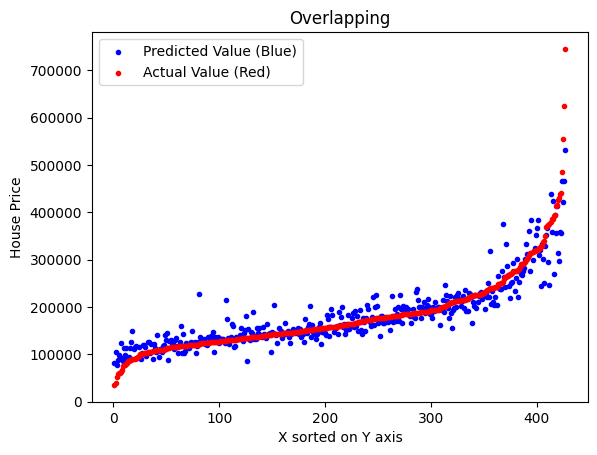

In [39]:
import matplotlib.pyplot as plt


result = list(zip(y_val, y_pred))

result = sorted(result, key=lambda x: x[0])


# Separate the values into 'red' and 'blue' lists
y_val_red = [item[0] for item in result if item[0] is not None]
y_pred_blue = [item[1] for item in result if item[0] is not None]

# Generate x values as increments from 1 to n (assuming n is the length of the lists)
x = np.arange(1, len(result) + 1)

# Create a scatter plot with red and blue points

plt.scatter(x, y_pred_blue, c='blue', marker='.', label='Predicted Value (Blue)')
plt.scatter(x, y_val_red, c='red', marker='.', label='Actual Value (Red)')

# Add labels and a legend
plt.xlabel('X sorted on Y axis')
plt.ylabel('House Price')
plt.title('Overlapping')
plt.legend()

# Show the plot
plt.show()








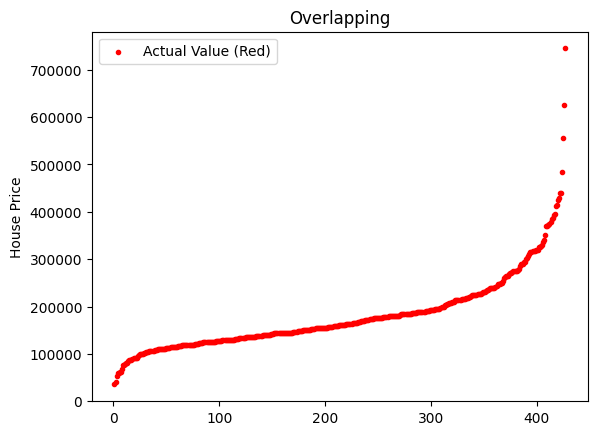

In [40]:

# Separate the values into 'red' and 'blue' lists
y_val_red = [item[0] for item in result if item[0] is not None]

# Generate x values as increments from 1 to n (assuming n is the length of the lists)
x = np.arange(1, len(result) + 1)

# Create a scatter plot with red and blue points
plt.scatter(x, y_val_red, c='red', marker='.', label='Actual Value (Red)')
# Add labels and a legend
plt.xlabel('')
plt.ylabel('House Price')
plt.title('Overlapping')
plt.legend()

# Show the plot
plt.show()


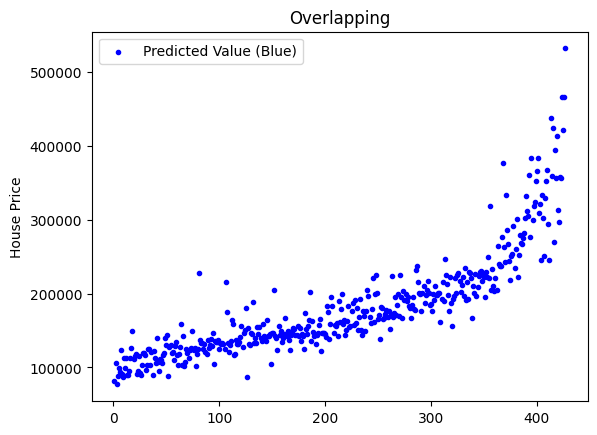

In [41]:

# Separate the values into 'red' and 'blue' lists
y_pred_blue = [item[1] for item in result if item[0] is not None]

# Generate x values as increments from 1 to n (assuming n is the length of the lists)
x = np.arange(1, len(result) + 1)

# Create a scatter plot with red and blue points
plt.scatter(x, y_pred_blue, c='blue', marker='.', label='Predicted Value (Blue)')

# Add labels and a legend
plt.xlabel('')
plt.ylabel('House Price')
plt.title('Overlapping')
plt.legend()

# Show the plot
plt.show()

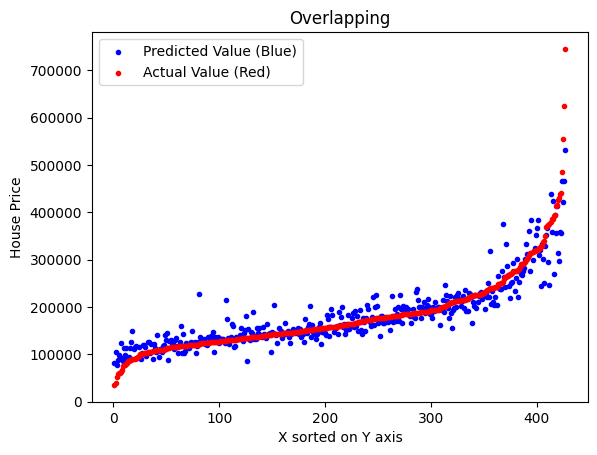

In [43]:
import matplotlib.pyplot as plt


result = list(zip(y_val, y_pred))

result = sorted(result, key=lambda x: x[0])


#Separate the values into 'red' and 'blue' lists
y_val_red = [item[0] for item in result if item[0] is not None]
y_pred_blue = [item[1] for item in result if item[0] is not None]

#Generate x values as increments from 1 to n (assuming n is the length of the lists)
x = np.arange(1, len(result) + 1)

#Create a scatter plot with red and blue points
plt.scatter(x, y_pred_blue, c='blue', marker='.', label='Predicted Value (Blue)')
plt.scatter(x, y_val_red, c='red', marker='.', label='Actual Value (Red)')

#Add labels and a legend
plt.xlabel('X sorted on Y axis')
plt.ylabel('House Price')
plt.title('Overlapping')
plt.legend()

#Show the plot
plt.show()

In [ ]:
import gradio as gr

  #input
def predict(Id, LotArea, Neighborhood, BldgType, OverallQual, OverallCond, YearBuilt, YearRemodAdd,
            ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2,
            Heating, CentralAir, _1stFlrSF, _2ndFlrSF, BsmtFullBath, BsmtHalfBath, FullBath,
            HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, Fireplaces, GarageArea, WoodDeckSF,
            OpenPorchSF, PoolArea, Fence, MoSold, YrSold, SaleType, SaleCondition):



    my_data_frame = pd.DataFrame(columns=['Id', 'LotArea', 'Neighborhood', 'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual',
                                          'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
                                          'CentralAir', '1stFlrSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'GarageArea',
                                          'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'])


    # Create a DataFrame for categorical to numerical mapping
    cat_to_num_mapping = pd.DataFrame({
        'Neighborhood': [Neighborhood],
        'BldgType': [BldgType],
        'ExterQual': [ExterQual],
        'ExterCond': [ExterCond],
        'BsmtQual': [BsmtQual],
        'BsmtCond': [BsmtCond],
        'BsmtExposure': [BsmtExposure],
        'BsmtFinType1': [BsmtFinType1],
        'BsmtFinType2': [BsmtFinType2],
        'Heating': [Heating],
        'CentralAir': [CentralAir],
        'KitchenQual': [KitchenQual],
        'Fence': [Fence],
        'SaleType': [SaleType],
        'SaleCondition': [SaleCondition]
    })

      # Create a DataFrame with the provided input data





    input_data = pd.DataFrame({
    'Id': [Id],
    'LotArea': [LotArea],
    'Neighborhood': [Neighborhood],
    'BldgType': [BldgType],
    'OverallQual': [OverallQual],
    'OverallCond': [OverallCond],
    'YearBuilt': [YearBuilt],
    'YearRemodAdd': [YearRemodAdd],
    'ExterQual': [ExterQual],
    'ExterCond': [ExterCond],
    'BsmtQual': [BsmtQual],
    'BsmtCond': [BsmtCond],
    'BsmtExposure': [BsmtExposure],
    'BsmtFinType1': [BsmtFinType1],
    'BsmtFinType2': [BsmtFinType2],
    'Heating': [Heating],
    'CentralAir': [CentralAir],
    '1stFlrSF': [_1stFlrSF],
    '2ndFlrSF': [_2ndFlrSF],
    'BsmtFullBath': [BsmtFullBath],
    'BsmtHalfBath': [BsmtHalfBath],
    'FullBath': [FullBath],
    'HalfBath': [HalfBath],
    'BedroomAbvGr': [BedroomAbvGr],
    'KitchenAbvGr': [KitchenAbvGr],
    'KitchenQual': [KitchenQual],
    'Fireplaces': [Fireplaces],
    'GarageArea': [GarageArea],
    'WoodDeckSF': [WoodDeckSF],
    'OpenPorchSF': [OpenPorchSF],
    'PoolArea': [PoolArea],
    'Fence': [Fence],
    'MoSold': [MoSold],
    'YrSold': [YrSold],
    'SaleType': [SaleType],
    'SaleCondition': [SaleCondition]
    },
    columns=['Id', 'LotArea', 'Neighborhood', 'BldgType', 'OverallQual', 'OverallCond',
           'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
           'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', '1stFlrSF',
           '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
           'KitchenAbvGr', 'KitchenQual', 'Fireplaces', 'GarageArea', 'WoodDeckSF',
           'OpenPorchSF', 'PoolArea', 'Fence', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'])











    counter = 0
    list_of_input_objects = [Neighborhood, BldgType, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, CentralAir, KitchenQual, Fence, SaleType, SaleCondition]
    training_data_non_id['BsmtExposure'] = training_data_non_id['BsmtExposure'].fillna('None')
    training_data_non_id['BsmtQual'] = training_data_non_id['BsmtQual'].fillna('None')
    training_data_non_id['BsmtCond'] = training_data_non_id['BsmtCond'].fillna('None')
    training_data_non_id['BsmtFinType1'] = training_data_non_id['BsmtFinType1'].fillna('None')
    training_data_non_id['BsmtFinType2'] = training_data_non_id['BsmtFinType2'].fillna('None')
    training_data_non_id['BsmtFullBath'] = training_data_non_id['BsmtFullBath'].fillna(0.0)
    training_data_non_id['BsmtHalfBath'] = training_data_non_id['BsmtHalfBath'].fillna(0.0)
    training_data_non_id['KitchenQual'] = training_data_non_id['KitchenQual'].fillna('None')
    training_data_non_id['GarageArea'] = training_data_non_id['GarageArea'].fillna(0.0)
    training_data_non_id['SaleType'] = training_data_non_id['SaleType'].fillna('None')


    for column in cat_to_num_mapping.columns:

      print(column)
      uniques = training_data_non_id[column].unique()
      print(uniques)
      uniques = sorted(uniques)
      print("sorted:",uniques)
      current_num = 0.0

      print(uniques.index(list_of_input_objects[counter]))
      input_data[column] = [uniques.index(list_of_input_objects[counter])]

      counter += 1



    print("finished columns")




    print(input_data)

    print(input_data.columns)
    print(X.columns)

    input_prediction = regressor.predict(input_data)
    print(input_prediction)

    print("end")

    return input_prediction



# Dropdown options for categorical features
training_data_non_id['BsmtExposure'] = training_data_non_id['BsmtExposure'].fillna('None')
neighborhood_options = set(training_data_non_id['Neighborhood'].unique())

bldg_type_options =set(training_data_non_id['BldgType'].unique())


exter_qual_options =set(training_data_non_id['ExterQual'].unique())

exter_cond_options = set(training_data_non_id['ExterCond'].unique())

bsmt_qual_options = set(training_data_non_id['BsmtQual'].unique())

bsmt_cond_options = set(training_data_non_id['BsmtCond'].unique())

bsmt_exposure_options =set(training_data_non_id['BsmtExposure'].unique())

bsmt_fin_type1_options =set(training_data_non_id['BsmtFinType1'].unique())

bsmt_fin_type2_options = set(training_data_non_id['BsmtFinType2'].unique())

heating_options =set(training_data_non_id['Heating'].unique())

central_air_options =set(training_data_non_id['CentralAir'].unique())

kitchen_qual_options = set(training_data_non_id['KitchenQual'].unique())

fence_options =set(training_data_non_id['Fence'].unique())

sale_type_options =set(training_data_non_id['SaleType'].unique())

sale_condition_options =set(training_data_non_id['SaleCondition'].unique())

# Define Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs=[
        gr.components.Number(name="Id"),
        gr.components.Number(name="LotArea"),
        gr.components.Dropdown(neighborhood_options, name="Neighborhood"),
        gr.components.Dropdown(bldg_type_options, name="BldgType"),
        gr.components.Number(name="OverallQual"),
        gr.components.Number(name="OverallCond"),
        gr.components.Number(name="YearBuilt"),
        gr.components.Number(name="YearRemodAdd"),
        gr.components.Dropdown(exter_qual_options, name="ExterQual"),
        gr.components.Dropdown(exter_cond_options, name="ExterCond"),
        gr.components.Dropdown(bsmt_qual_options, name="BsmtQual"),
        gr.components.Dropdown(bsmt_cond_options, name="BsmtCond"),
        gr.components.Dropdown(bsmt_exposure_options, name="BsmtExposure"),
        gr.components.Dropdown(bsmt_fin_type1_options, name="BsmtFinType1"),
        gr.components.Dropdown(bsmt_fin_type2_options, name="BsmtFinType2"),
        gr.components.Dropdown(heating_options, name="Heating"),
        gr.components.Dropdown(central_air_options, name="CentralAir"),
        gr.components.Number(name="1stFlrSF"),
        gr.components.Number(name="2ndFlrSF"),
        gr.components.Number(name="BsmtFullBath"),  # Keep as a number input
        gr.components.Number(name="BsmtHalfBath"),  # Keep as a number input
        gr.components.Number(name="FullBath"),
        gr.components.Number(name="HalfBath"),
        gr.components.Number(name="BedroomAbvGr"),
        gr.components.Number(name="KitchenAbvGr"),
        gr.components.Dropdown(kitchen_qual_options, name="KitchenQual"),
        gr.components.Number(name="Fireplaces"),
        gr.components.Number(name="GarageArea"),
        gr.components.Number(name="WoodDeckSF"),
        gr.components.Number(name="OpenPorchSF"),
        gr.components.Number(name="PoolArea"),
        gr.components.Dropdown(fence_options, name="Fence"),
        gr.components.Number(name="MoSold"),
        gr.components.Number(name="YrSold"),
        gr.components.Dropdown(sale_type_options, name="SaleType"),
        gr.components.Dropdown(sale_condition_options, name="SaleCondition"),
    ],
    outputs="text"  # Change this based on your prediction function output
)

iface.launch(debug=True, share=True)


<ipython-input-44-3269958ad743>:184: GradioUnusedKwargWarning: You have unused kwarg parameters in Number, please remove them: {'name': 'Id'}
  gr.components.Number(name="Id"),
<ipython-input-44-3269958ad743>:185: GradioUnusedKwargWarning: You have unused kwarg parameters in Number, please remove them: {'name': 'LotArea'}
  gr.components.Number(name="LotArea"),
<ipython-input-44-3269958ad743>:186: GradioUnusedKwargWarning: You have unused kwarg parameters in Dropdown, please remove them: {'name': 'Neighborhood'}
  gr.components.Dropdown(neighborhood_options, name="Neighborhood"),
<ipython-input-44-3269958ad743>:187: GradioUnusedKwargWarning: You have unused kwarg parameters in Dropdown, please remove them: {'name': 'BldgType'}
  gr.components.Dropdown(bldg_type_options, name="BldgType"),
<ipython-input-44-3269958ad743>:188: GradioUnusedKwargWarning: You have unused kwarg parameters in Number, please remove them: {'name': 'OverallQual'}
  gr.components.Number(name="OverallQual"),
<ipyth

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://3848d410d77f5a90c3.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
